In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# 1)Import required libraries and read the dataset.

In [3]:
df=pd.read_csv('honeyproduction.csv')
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


# 2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [6]:
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
471,FL,170000.0,68,11560000.0,1618000.0,1.42,16415000.0,2009
528,NJ,13000.0,35,455000.0,73000.0,1.90,865000.0,2010
576,SD,250000.0,66,16500000.0,4290000.0,1.70,28050000.0,2011
165,TX,97000.0,79,7663000.0,1533000.0,0.65,4981000.0,2001
239,NE,45000.0,74,3330000.0,1299000.0,1.38,4595000.0,2003


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [8]:
df.shape

(626, 8)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


# 3)Display the percentage distribution of the data in each year using the pie chart

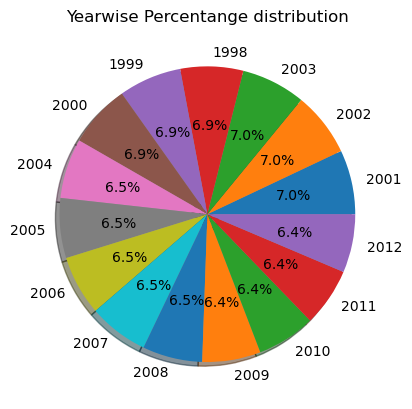

In [10]:
a=df['year'].value_counts()
data=a.values
labels=a.index
plt.pie(x=data,labels=labels,autopct='%0.1f%%',shadow=True)
plt.title('Yearwise Percentange distribution')
plt.show()

# 4) Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings

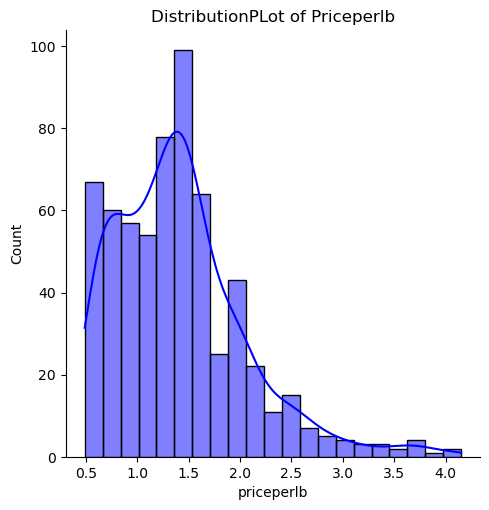

In [11]:
sns.displot(data=df,x='priceperlb',kde=True,color='blue')
plt.title("DistributionPLot of Priceperlb")
plt.show()

# 5) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

In [12]:
df['numcol'].corr(df['prodvalue'])

0.9127962488930387

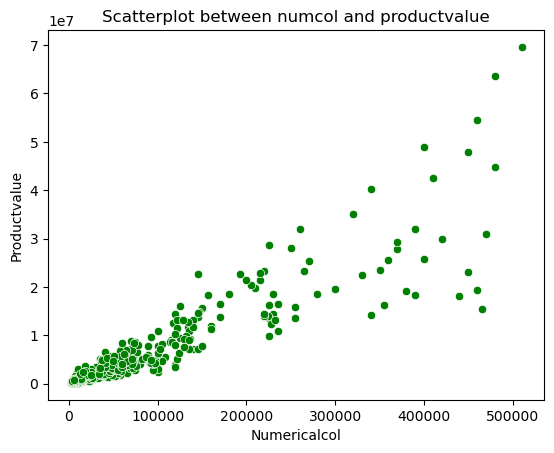

In [13]:
sns.scatterplot(data=df,x='numcol',y='prodvalue',color='green')
plt.title('Scatterplot between numcol and productvalue')
plt.xlabel('Numericalcol')
plt.ylabel("Productvalue")
plt.show()

# 6) Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings

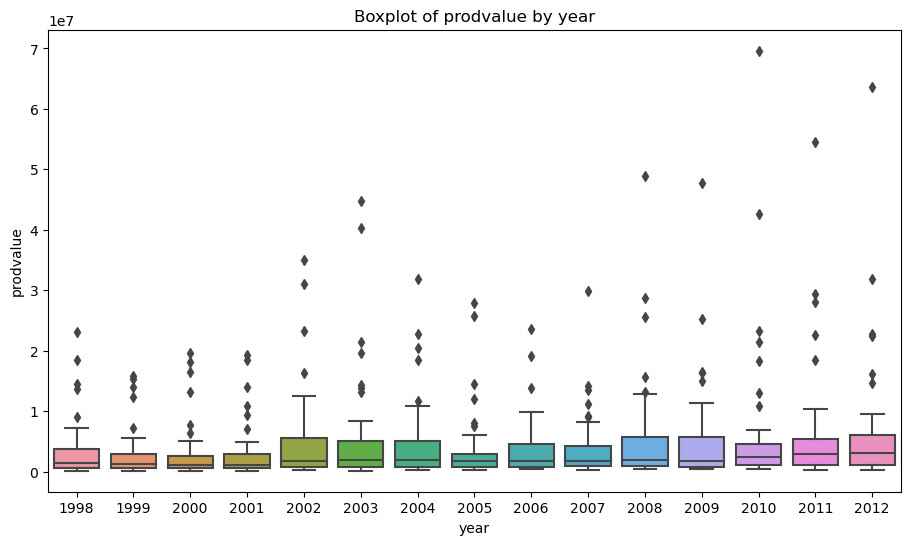

In [14]:
plt.figure(figsize=(11,6))
sns.boxplot(data=df,x='year', y='prodvalue')
plt.title('Boxplot of prodvalue by year')
plt.show()

# 7) Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

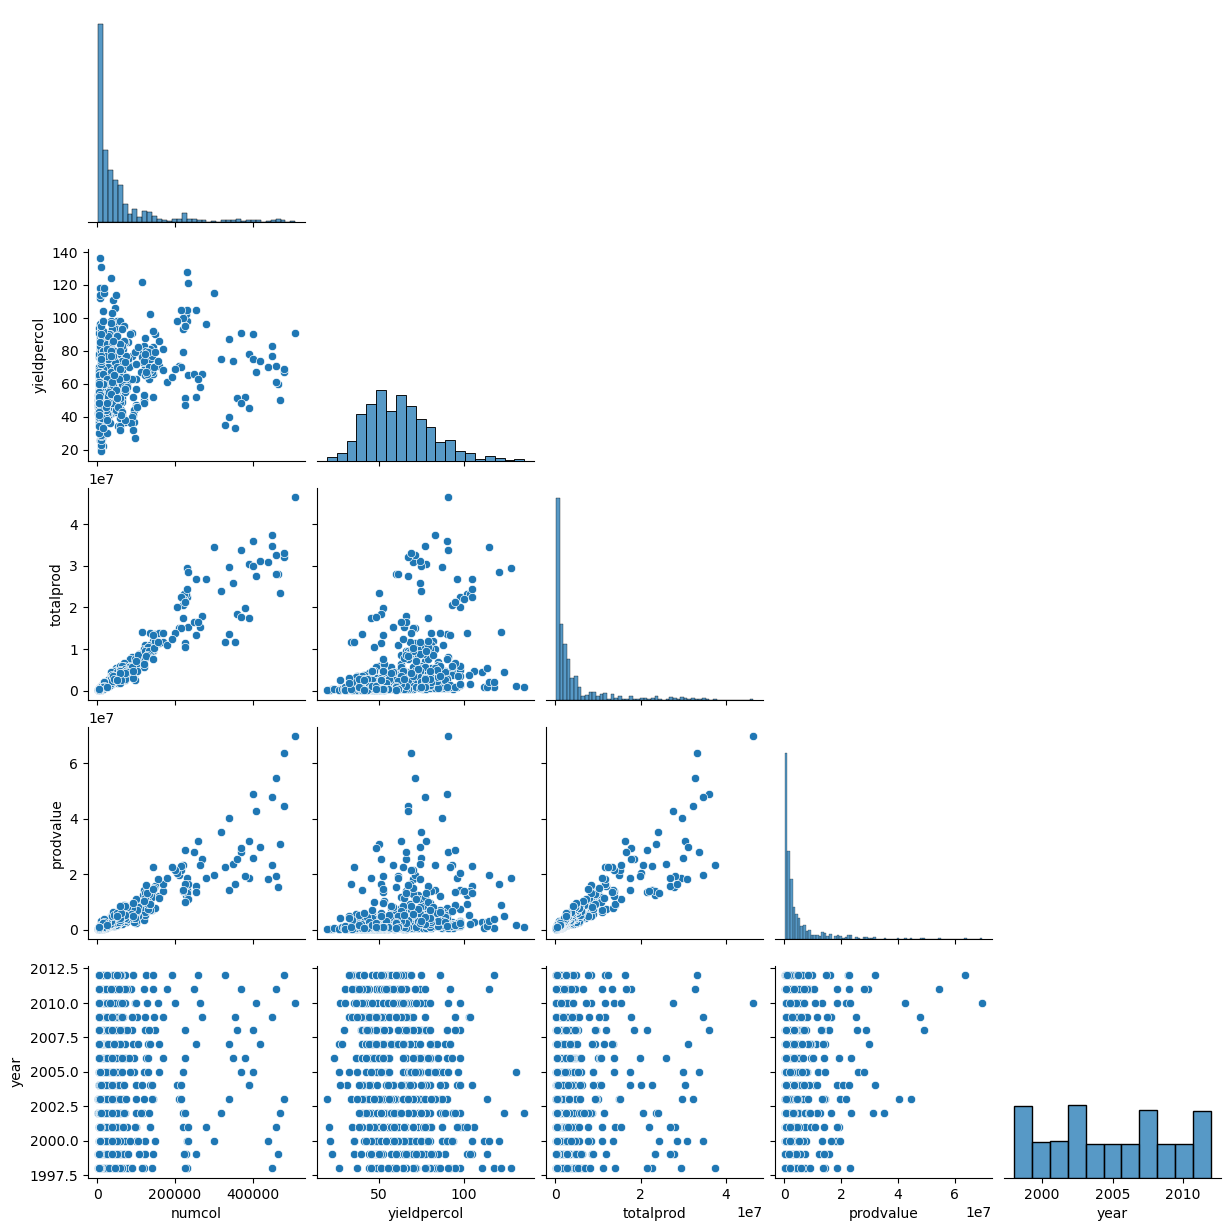

In [17]:
sns.pairplot(data=df,vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year'],corner=True)
plt.show()

# 8) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

In [18]:
correlation=df.corr(numeric_only=True)
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


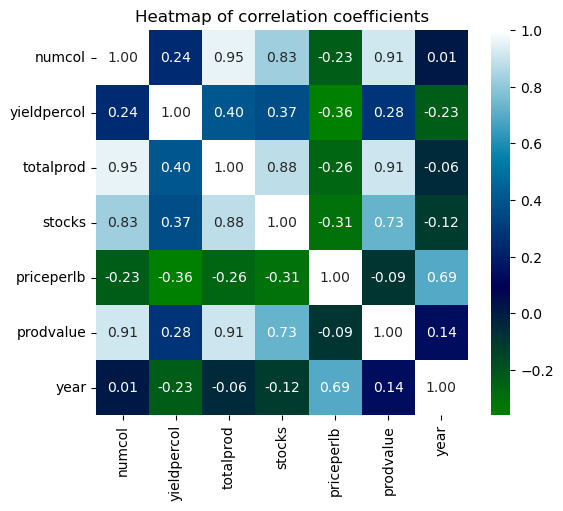

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation,annot=True,cmap='ocean',cbar=True,fmt='0.2f')
plt.title("Heatmap of correlation coefficients")
plt.show()